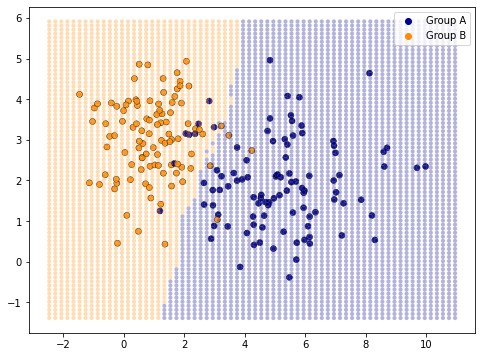

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.colors 

data_dir ="g:/碩班/統計與數學應用/ml_data/"
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers
n = len(y)

#------散佈圖---------
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')

# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), \
np.arange(y_min, y_max, 0.1)) # grid points: matrices
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))
    d = np.linalg.norm(tmp - X, axis = 1) # n distances
    idx = np.argsort(d) # sorting K distances
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
z = [0 if i < 0.5 else 1 for i in z]

#----空間顏色分群------
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
markers = '.', palette = cmap_bold, hue = z, alpha = 0.3, legend = False)

#-----分界線--------
K = 15
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['cornflowerblue', 'orange'])
#plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
#plt.title('Training error = %.4f for K = %i' % (trainingErr,K))


G:\碩班\統計與數學應用\HW5圖片

Text(0.5, 1.0, 'Training error = 0.1117 for K = 5')

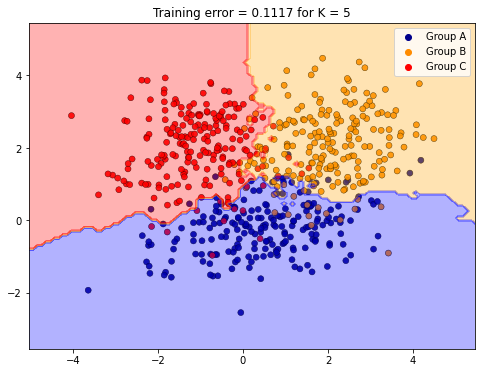

In [4]:
#------生成資料--------
%run demo_data.ipynb
n = [200, 200, 200] # sample size for each group
m = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
Cov1 = np.array([[2.0, 0.3], [0.3, 0.5]])
Cov2 = np.array([[1.0, 0.], [0., 1.]])
Cov3 = np.array([[1, 0.], [0., 1]])
name='test'
X, y = multiclass_data(n,m,Cov1,Cov2,Cov3,name)


D = np.loadtxt('E:/統計應用/demo_data_%s.txt'%name)
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers
n = len(y)


cmap_bold = ['darkblue', 'darkorange','red']
Group_name = np.array(['Group A', 'Group B','Group C'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')

# ------KNN learning-------
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), \
np.arange(y_min, y_max, 0.1)) # grid points: matrices
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))
    d = np.linalg.norm(tmp - X, axis = 1) # n distances
    idx = np.argsort(d) # sorting K distances
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
z = [0 if i < 0.5 else 1 for i in z]


K = 5
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['blue', 'orange','red'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))

